In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
titanic = pd.read_csv('titanic-data.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Proposing questions
数据集里面有多列，主观上感觉是Pclass, Sex, Age 这三个因素会影响是否生活，因此提出问题:Pclass, Sex, Age是否会影响Titanic生还率？

# Data wrangling
    1) 补全missing value,
    2) 拆分Name column， 可以将Name拆分为： First name,last name (using vectorized str.split (https://stackoverflow.com/questions/37333299/splitting-a-column-by-delimiter-pandas-python)

In [3]:
titanic = titanic.fillna(value = 0 )
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
5,6,0,3,"Moran, Mr. James",male,0.0,0,0,330877,8.4583,0,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,0,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,0,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,0,C


In [4]:
split_names = titanic['Name'].str.split(',',expand=True)
titanic['Lname'] = split_names[0]
titanic['Fname'] = split_names[1].str.split('.',expand=True)[1]
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Lname,Fname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,Braund,Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,Heikkinen,Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,Allen,William Henry


In [5]:
print (titanic.shape)
titanic_factors = titanic[['Survived','Pclass','Sex','Age']]
titanic_factors.head()

(891, 14)


,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


# Exploring Phase 
## 单变量分析
### 1）Pclass(船舱级别)
 

In [6]:
titanic_pclass = titanic_factors[['Survived','Pclass']]
pclass_group = titanic_pclass.groupby('Pclass')
for pclass, pclass_df in pclass_group:
    print (pclass)
    print (pclass_df)

1
     Survived  Pclass
1           1       1
3           1       1
6           0       1
11          1       1
23          1       1
27          0       1
30          0       1
31          1       1
34          0       1
35          0       1
52          1       1
54          0       1
55          1       1
61          1       1
62          0       1
64          0       1
83          0       1
88          1       1
92          0       1
96          0       1
97          1       1
102         0       1
110         0       1
118         0       1
124         0       1
136         1       1
137         0       1
139         0       1
151         1       1
155         0       1
..        ...     ...
763         1       1
765         1       1
766         0       1
779         1       1
781         1       1
782         0       1
789         0       1
793         0       1
796         1       1
802         1       1
806         0       1
809         1       1
815         0       1
820     

In [11]:
total_by_pclass_group = pclass_group.count()
#total_by_pclass_group.rename(columns={'Survived':'Total'},inplace=True)
print (total_by_pclass_group)

        Survived
Pclass          
1            216
2            184
3            491


In [9]:
survived_by_pclass_group = pclass_group.sum()
print (survived_by_pclass_group)

        Survived
Pclass          
1            136
2             87
3            119


In [12]:
survival_rate = survived_by_pclass_group / total_by_pclass_group
survival_rate.rename(columns={'Survived':"Survival_Rate"},inplace=True)
print (survival_rate)
# 问题：如果在43Cell中先重命名column names, 此时如果用如上运算会得到NaN，这是为什么？ rename方法我使用了inplace= TRUE啊

        Survival_Rate
Pclass               
1            0.629630
2            0.472826
3            0.242363


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

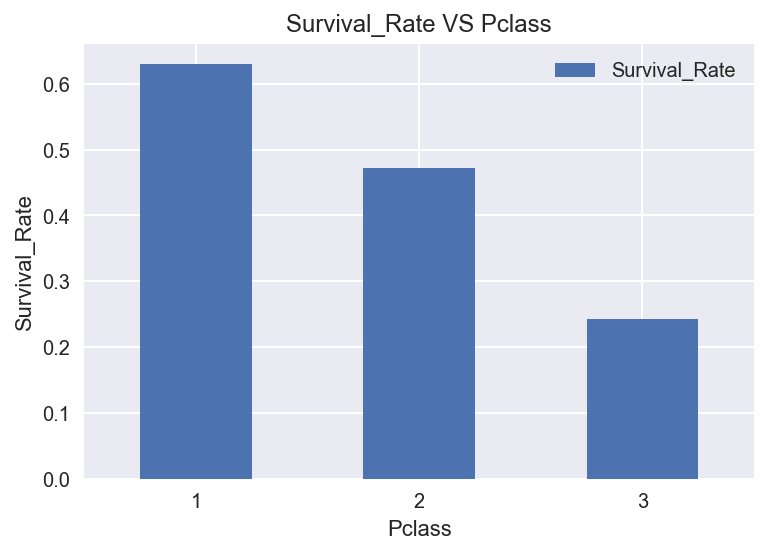

In [13]:
axe = survival_rate.plot(kind='bar',title='Survival_Rate VS Pclass')
axe.set_ylabel("Survival_Rate")
plt.xticks(rotation='horizontal')

### 1）Pclass 分析小结
通常来说，船舱的位置越低，生还机会相对较小，从上图可以看出，Survival_Rate(pclass=1) > Survival_Rate(pclass=2) >Survival_Rate(pclass=3), 因此可以船舱级别是影响生还可能的因素之一。 

In [14]:
#根据factor, 编写计算生还率函数，代码复用高
def cal_survival_rate(factor):
    titanic_factor = titanic_factors[['Survived',factor]]
    #group titaninc_factor by each factor,
    factor_group = titanic_factor.groupby(factor)
    total = factor_group.count()
    survival = factor_group.sum()
    survival_rate = survival / total 
    print (total.rename(columns={'Survived':'Count'}))
    print (survival)
    print (survival_rate.rename(columns={'Survived':"Survival_Rate"}))
    
    #Plot total 
    axe_count = total.plot(kind='bar',title = factor + " & Count ")
    axe_count.set_ylabel("Count")
    
    #Plot survival rate
    axe_rate = survival_rate.plot(kind='bar',title = "Survival_Rate & "+factor)
    axe_rate.set_ylabel("Survival_Rate")
    return survival_rate

### 2）Sex(性别)


        Count
Sex          
female    314
male      577
        Survived
Sex             
female       233
male         109
        Survival_Rate
Sex                  
female       0.742038
male         0.188908


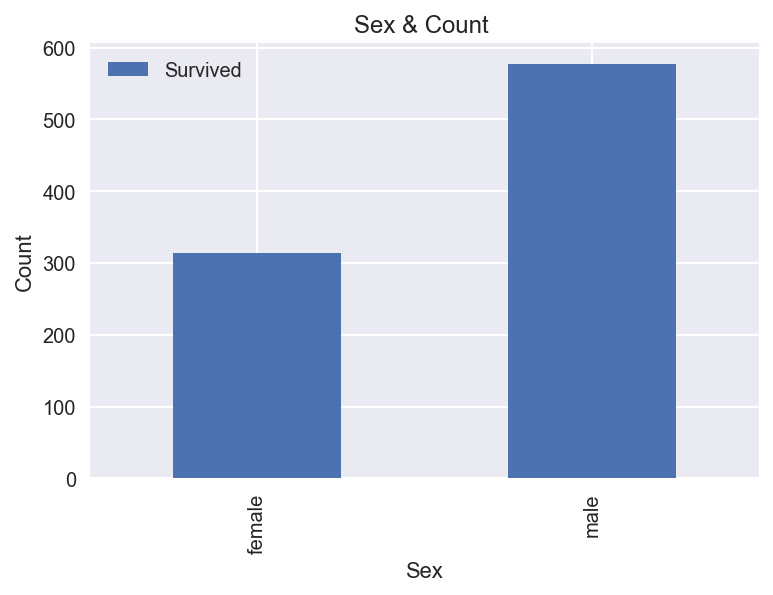

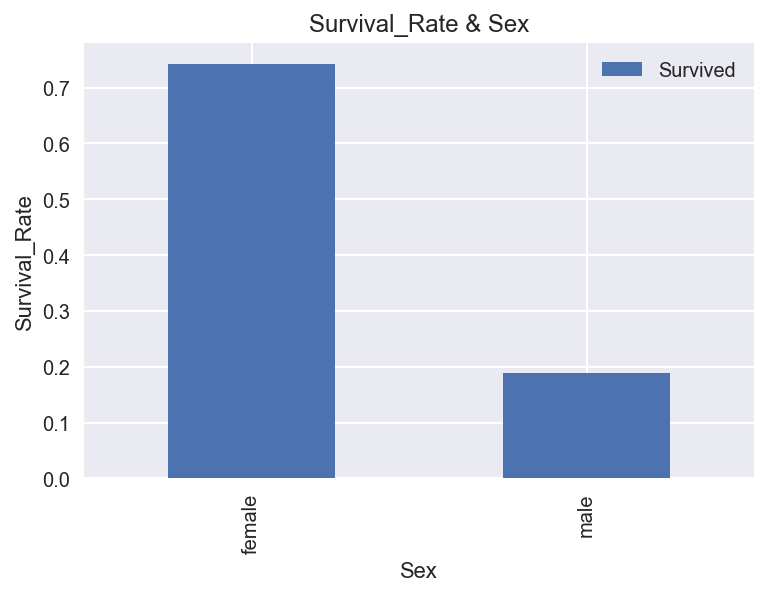

In [15]:
sex_survival_rate = cal_survival_rate("Sex")



### 2）Sex 分析小结
通常来说，男性的体格、体力等方面要由于女性，因此可以推测男性的生还率要高于女性。但是观察上图，男性的人数大致高于女性一倍，而女性的生活率是男性生还率的三倍不止，因此可以猜想，灾难发生时，有可能是女生优先逃生。

        Count
Pclass       
1         216
2         184
3         491
        Survived
Pclass          
1            136
2             87
3            119
        Survival_Rate
Pclass               
1            0.629630
2            0.472826
3            0.242363


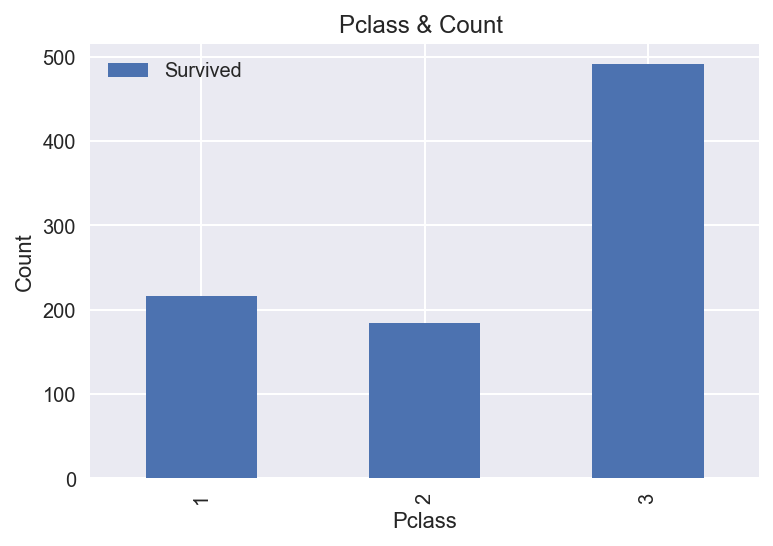

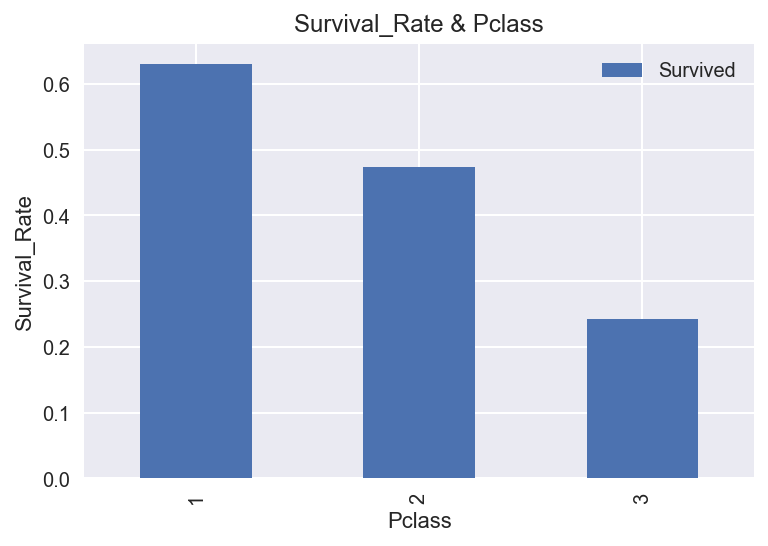

In [16]:
# 测试函数是否是适用于Pclass
pclass_survival_rate = cal_survival_rate('Pclass')

### 3）Age 

In [41]:
titanic_age = titanic_factors[['Survived','Age']]
titanic_age.head()

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0


In [98]:
# 有些值为NaN，因为包含数值0，但是因为左开区间，故为NaN，现在清洗这些值
#https://chrisalbon.com/python/pandas_binning_data.html
#https://stackoverflow.com/questions/47053770/pandas-cut-how-to-convert-nans-or-to-convert-the-output-to-non-categorical
labels = [ "({0} - {1}]".format(i, i + 10) for i in range(0, 100, 10) ]
titanic_age['Range'] = pd.cut(titanic_age['Age'],range(0,105,10),include_lowest= False, 
                              right = True, labels=labels).values.add_categories('missing')
titanic_age = titanic_age.fillna(value = 'missing')

titanic_age.head()

,Survived,Age,Range
0,0,22.0,(20 - 30]
1,1,38.0,(30 - 40]
2,1,26.0,(20 - 30]
3,1,35.0,(30 - 40]
4,0,35.0,(30 - 40]


In [99]:
pd.value_counts(titanic_age['Range'])

(20 - 30]     230
missing       177
(30 - 40]     155
(10 - 20]     115
(40 - 50]      86
(0 - 10]       64
(50 - 60]      42
(60 - 70]      17
(70 - 80]       5
(90 - 100]      0
(80 - 90]       0
Name: Range, dtype: int64

In [66]:
# 总记录数为891， 年龄落在区间内的为714， 缺失值并填充为0的总共177
titanic_age.shape

(891, 3)

In [100]:
groupby_age = titanic_age[['Survived','Range']]
survived_groupby_age = groupby_age[groupby_age['Survived'] == 1].groupby('Range').count()
dead_groupby_age = groupby_age[groupby_age['Survived'] == 0].groupby('Range').count()

print (dead_groupby_age.rename(columns={'Survived':'Dead'}))
print (survived_groupby_age)


            Dead
Range           
(0 - 10]      26
(10 - 20]     71
(20 - 30]    146
(30 - 40]     86
(40 - 50]     53
(50 - 60]     25
(60 - 70]     13
(70 - 80]      4
(80 - 90]      0
(90 - 100]     0
missing      125
            Survived
Range               
(0 - 10]          38
(10 - 20]         44
(20 - 30]         84
(30 - 40]         69
(40 - 50]         33
(50 - 60]         17
(60 - 70]          4
(70 - 80]          1
(80 - 90]          0
(90 - 100]         0
missing           52


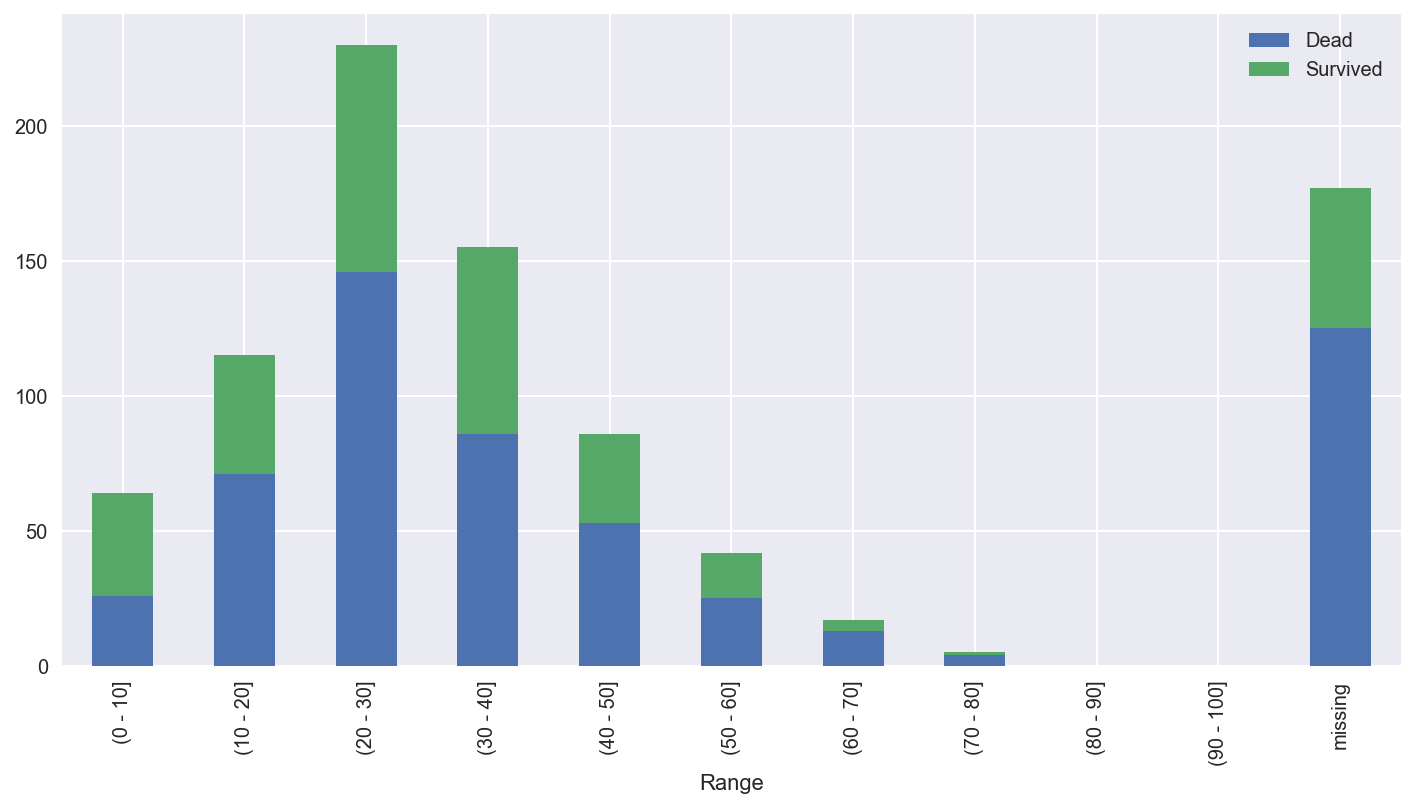

In [68]:
total_age_count = pd.concat([dead_groupby_age.rename(columns={'Survived':'Dead'}),survived_groupby_age], axis=1)
axe_age_group_total = total_age_count.plot(kind='bar',stacked = True, figsize=(12,6))


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


            Count
Range            
(0 - 10]       64
(10 - 20]     115
(20 - 30]     230
(30 - 40]     155
(40 - 50]      86
(50 - 60]      42
(60 - 70]      17
(70 - 80]       5
(80 - 90]       0
(90 - 100]      0
missing       177
            Survived
Range               
(0 - 10]        38.0
(10 - 20]       44.0
(20 - 30]       84.0
(30 - 40]       69.0
(40 - 50]       33.0
(50 - 60]       17.0
(60 - 70]        4.0
(70 - 80]        1.0
(80 - 90]        NaN
(90 - 100]       NaN
missing         52.0
            Survival_Rate
Range                    
(0 - 10]         0.593750
(10 - 20]        0.382609
(20 - 30]        0.365217
(30 - 40]        0.445161
(40 - 50]        0.383721
(50 - 60]        0.404762
(60 - 70]        0.235294
(70 - 80]        0.200000
(80 - 90]             NaN
(90 - 100]            NaN
missing          0.293785


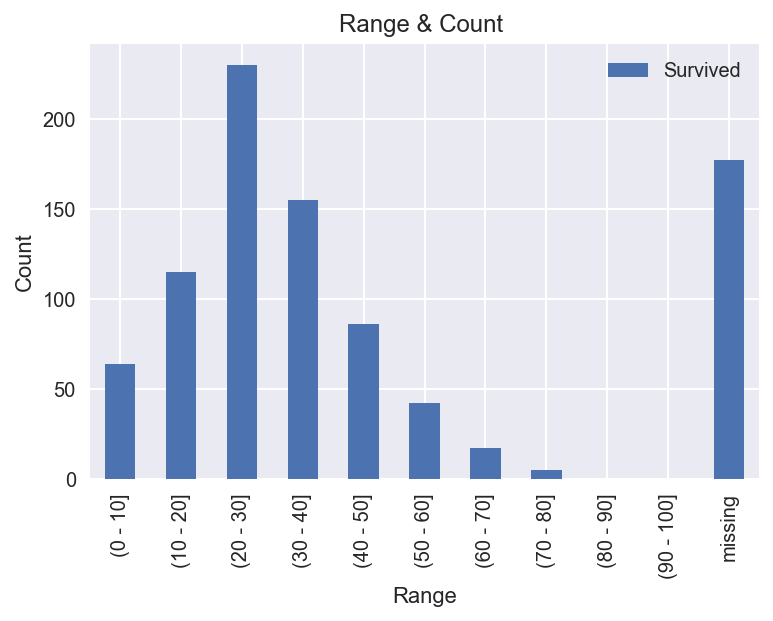

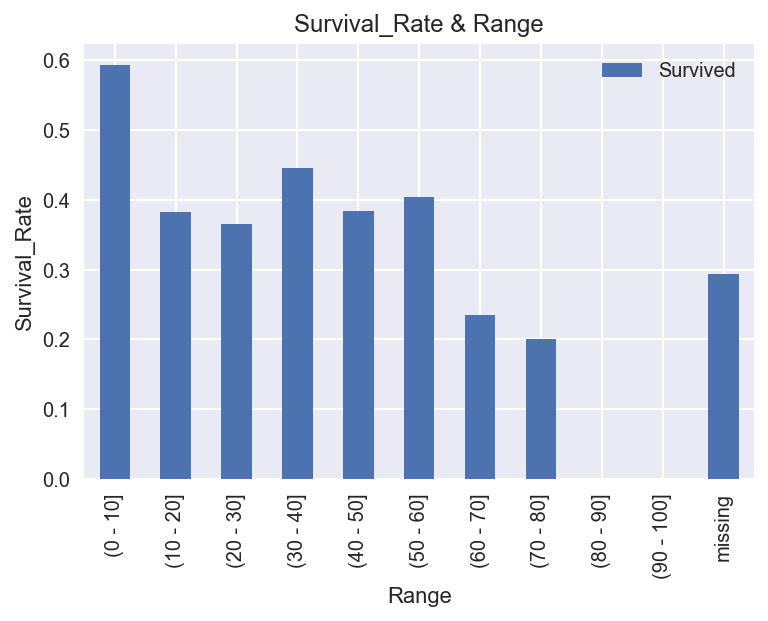

In [101]:
titanic_factors['Range'] = groupby_age['Range']
age_group_survival_rate = cal_survival_rate('Range')

### 3）年龄小结
就各年龄段的生存率来说，儿童（0-10）的生存几率最大（超过50%）。
其它年龄段没有特别明显的差异，均小于50%。最低的是老龄人（70-80），生还率仅有20%。但是因为未知年龄的人数较多，177人，因此可能会影响生还率就年龄而言

## 双变量分析


In [102]:
# 双变量分析
def double_variable(var1,var2):
    ax1_var1_var2 = titanic_factors.groupby([var1,var2])['Survived'].mean().unstack(level=-1).plot(kind='bar',figsize=(12,6))
    ax1_var1_var2.set_title(var1 + " && " + var2 + " VS " + "Avg. Survival")
    ax1_var1_var2.set_ylabel('Avg. Survival')


### 1）Pclass & Sex 

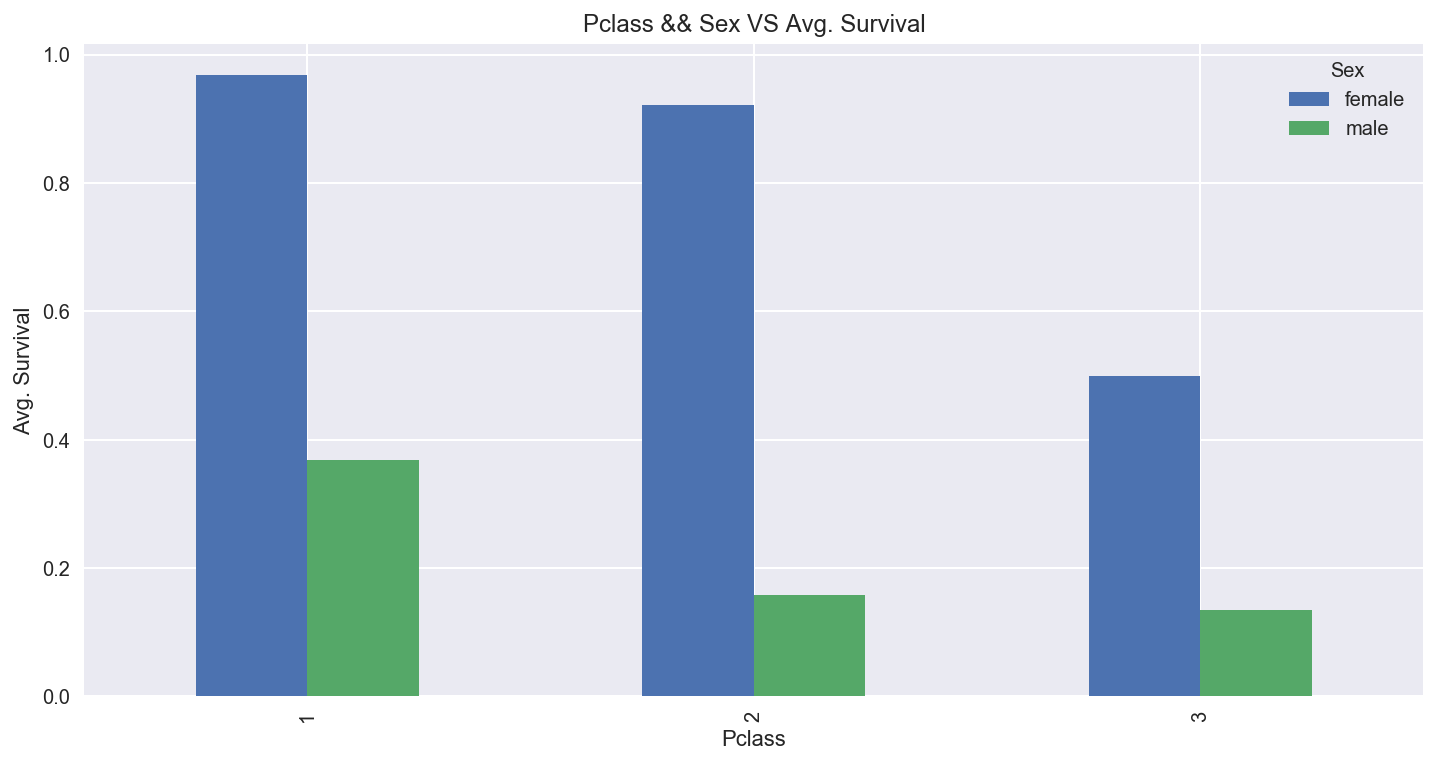

In [85]:
double_variable('Pclass','Sex')

### 1) Pclass & Sex 小结
如上图所示，不管是男性还是女性，生还率随着Pclass等级的提高而增大。


### 2) Age group & Pclass

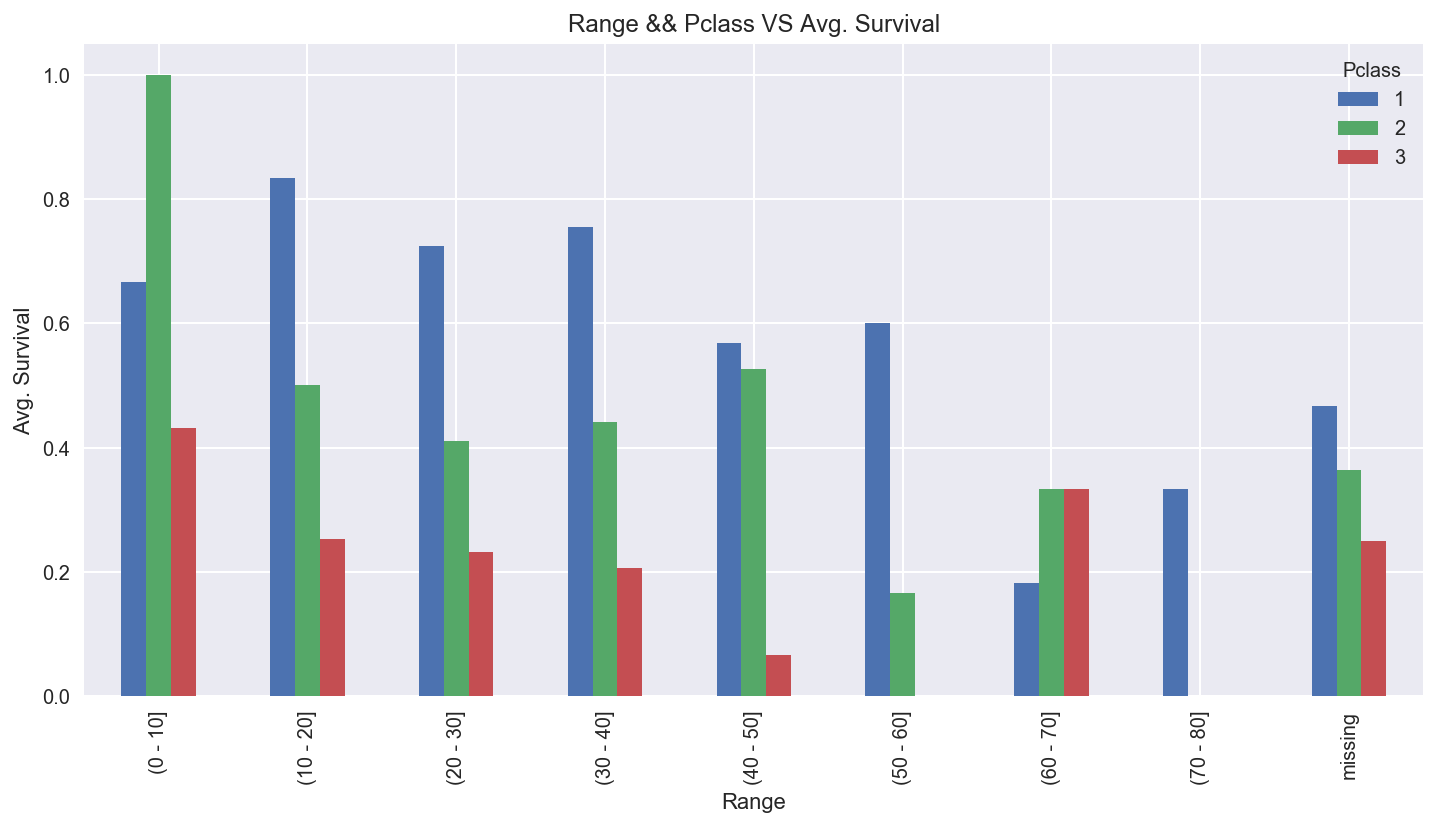

In [86]:
double_variable('Range','Pclass')

如上图所示，整体而言，平均生还人数随着船舱的等级升高而变高（无论年龄阶段），即Pclass 3 < 2 < 1, 在年龄10 - 60岁之前，每组年龄分布中都是Pclass 1 > 2 > 3. 但是有两组数据与上述悖论。年龄在(0-10]岁之间，生还率 Pclass 2 > 1. 年龄 > 70, Pclass = 2 or 3无人生还或者是其实船舱 2、3里无老人。因此需要对这两组数据单独验证：

In [92]:
pclass_1_age_10 = titanic_factors[(titanic_factors['Range'] == '(0 - 10]') & (titanic_factors['Pclass'] == 1)]
pclass_2_age_10 = titanic_factors[(titanic_factors['Range'] == '(0 - 10]') & (titanic_factors['Pclass'] == 2)]
print (pclass_1_age_10)
print (pclass_2_age_10)

     Survived  Pclass     Sex   Age     Range
297         0       1  female  2.00  (0 - 10]
305         1       1    male  0.92  (0 - 10]
445         1       1    male  4.00  (0 - 10]
     Survived  Pclass     Sex   Age     Range
43          1       2  female  3.00  (0 - 10]
58          1       2  female  5.00  (0 - 10]
78          1       2    male  0.83  (0 - 10]
183         1       2    male  1.00  (0 - 10]
193         1       2    male  3.00  (0 - 10]
237         1       2  female  8.00  (0 - 10]
340         1       2    male  2.00  (0 - 10]
407         1       2    male  3.00  (0 - 10]
530         1       2  female  2.00  (0 - 10]
535         1       2  female  7.00  (0 - 10]
549         1       2    male  8.00  (0 - 10]
618         1       2  female  4.00  (0 - 10]
720         1       2  female  6.00  (0 - 10]
750         1       2  female  4.00  (0 - 10]
755         1       2    male  0.67  (0 - 10]
827         1       2    male  1.00  (0 - 10]
831         1       2    male  0.8

如上所示，在年龄段为(0-10],Pclass = 1 有3位，其中只有2位生还，而Pclass = 2 中所有的人都生还。因此，Pclass = 2 生还率> 1 

In [94]:
pclass_2_age_70 = titanic_factors[(titanic_factors['Range'] == '(70 - 80]') & (titanic_factors['Pclass'] == 2)]
pclass_2_age_70

,Survived,Pclass,Sex,Age,Range


年龄段> 70岁，Pclass = 2 or 3 生还率为0，其实为该年龄段在船舱2、3无人搭乘

### 3） Age group & Sex 

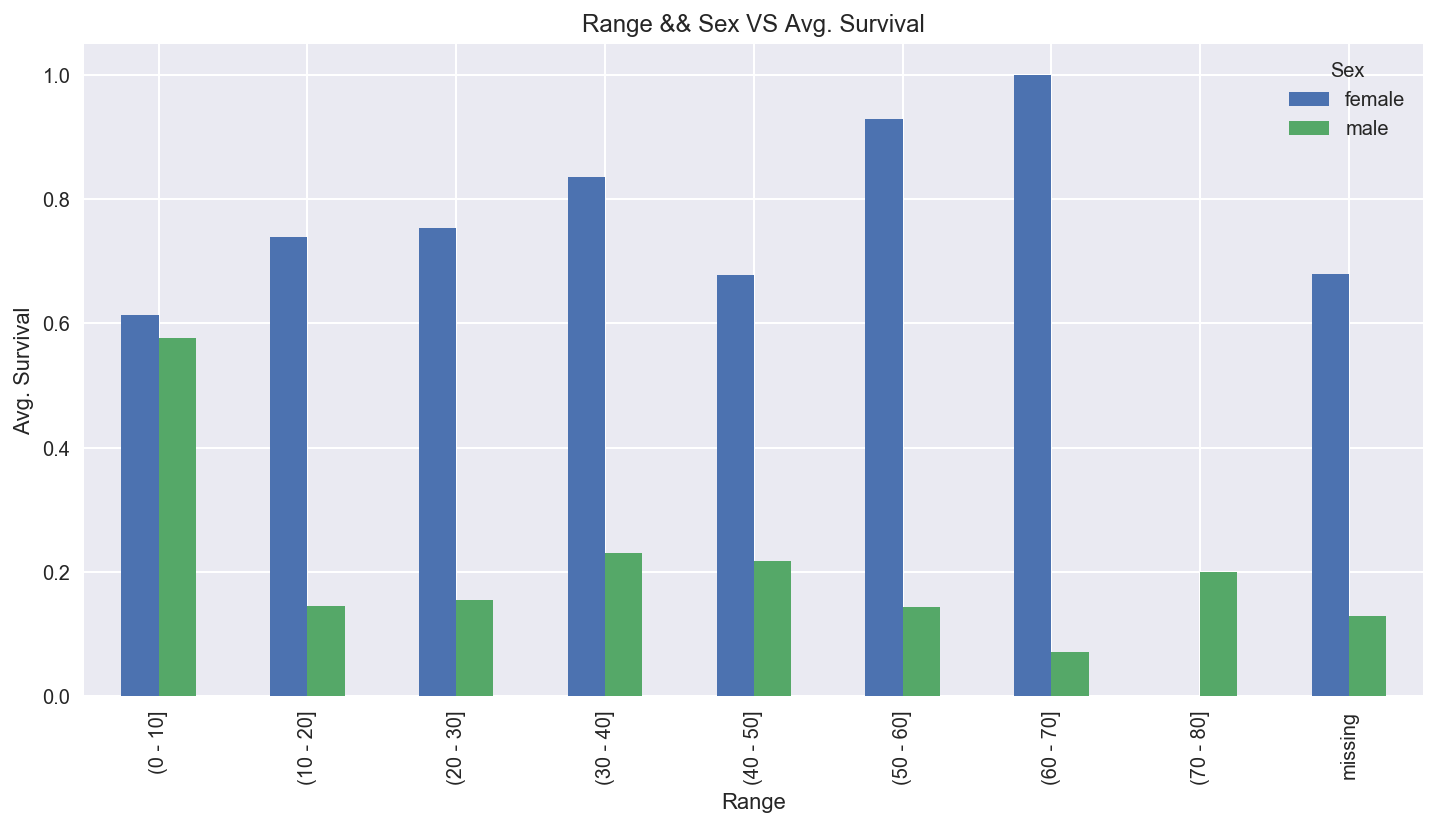

In [95]:
double_variable('Range','Sex')

如上图所示，几乎在各个年龄阶段女性的生还率要远高于男性。但是年龄段70-80之间反常，需单独分析

In [97]:
female_age_70 = titanic_factors[(titanic_factors['Range'] == '(70 - 80]') & (titanic_factors['Sex'] == 'female')]
female_age_70

,Survived,Pclass,Sex,Age,Range


如上所示，该年龄段的女性并未出现在船上。

# 小结 & 结论

综上分析可以看出， Pclass等级越高，生还人数越多，与年龄、性别无关；且女性的生还率要高于男性，无论Pclass或年龄； 相对来说儿童的生还率较高。

# 结论
通过对泰坦尼克号数据集分析，对于问题“:Pclass, Sex, Age是否会影响Titanic生还率？”得出以下结论：
1)Pclass, Sex , Age 是影响titanic生还率的因素； 
2)Pclass等级越高的女性，其生还率是最高的；其次则为儿童, 与性别、舱房等级无关；

但是，由于不清楚样本是否随机选取、样本量不大，而且且样本数据中存在信息缺失，因此无法判断Pclass,Sex,Age与“生还率”的相关性，既是否正相关、负相关或无关无法确定，需要更进一步分析。